##### Trabajo Semanal 7

##### Estimación espectral. Ventanas en acción!

En esta tarea continuaremos con el capítulo 14 de Holton. DSP Principles and App.

Para ello, realizaremos el punto 3.a del TP2.

3) Genere la siguiente señal
x(k)=a0⋅sen(Ω1⋅k)
siendo

a0=2
Ω1=Ω0+fr⋅2πN
Ω0=π2
y la variable aleatoria definida por la siguiente distribución de probabilidad

fr∼U(−2,2)


Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

3.a) Grafique los histogramas de
|Xiw(Ω0)|


siendo

|Xiw(Ω)|=|F{x(k)⋅wi(k)}|
para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

 Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual.
3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
a0^=|Xiw(Ω0)|
siendo

sa=E{a0^}−a0

va=var{a0^}=E{(a0^−E{a0^})2}
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

E{a0^}=μa^=1M∑j=0M−1aj^

sa=μa^−a0

va=1M∑j=0M−1(aj^−μa^)2


Estimación de Amplitud 
 
 
sa	va
Rectangular	 	 
Bartlett	 	 
Hann	 	 
Blackman	 	 
Flat-top	 	 

Inclusión de librerías

In [9]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Tarea semanal N°7

"""
# Inclusión de librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas
from pandas import DataFrame
from IPython.display import HTML

Inicialización de variables

In [3]:
# Inicialización de variables
plt.close('all')
fs=1000
N = 1000
df = fs/N # resolución espectral
amp = 2
freq = fs/4
ph = 0
dc = 0
muestras = 200
omega_ini = np.pi/2
ts = 1/fs
Wbins = 1

Simulaciones

In [4]:
#%% Ventanas

winBartlett = sig.windows.bartlett(N).reshape(N,1)
winHann = sig.windows.hann(N).reshape(N,1)
winBlackman = sig.windows.blackman(N).reshape(N,1)
winFlatTop = sig.windows.flattop(N).reshape(N,1)

noise = (np.random.rand(1,muestras)-0.5)*2

tt = np.linspace(0, (N-1)*ts, N).reshape(N,1)

omega = (omega_ini + noise * (np.pi*2/N))*tt*fs

seno = amp*np.sin(omega)

bartlettSeno = seno*winBartlett
hannSeno = seno*winHann
blackmanSeno = seno*winBlackman
flatTopSeno = seno*winFlatTop

# FFT
senoFFT = np.fft.fft(seno, axis=0) / seno.shape[0]
bartlettFFT = np.fft.fft(bartlettSeno, axis = 0)/bartlettSeno.shape[0]
hannFFT = np.fft.fft(hannSeno, axis = 0)/hannSeno.shape[0]
blackmanFFT = np.fft.fft(blackmanSeno, axis = 0)/blackmanSeno.shape[0]
flatTopFFT = np.fft.fft(flatTopSeno, axis = 0)/flatTopSeno.shape[0]

ff = np.arange(0, fs, fs/N)
bfrec = ff<=(fs/2)

In [5]:
#%% Estimadores
#Estimador 3A
bartlettEstAmp = np.abs(bartlettFFT[250, :])*2
hannEstAmp = np.abs(hannFFT[250, :])*2
blackmanEstAmp = np.abs(blackmanFFT[250, :])*2
flatTopEstAmp = np.abs(flatTopFFT[250, :])*2

#Estimador 3B
# Bartlett
bartlettDenPot = 2*np.abs(bartlettFFT)**2
bartlettSubMatriz = bartlettDenPot[250-Wbins:250+Wbins+1,:]
bartlettPotEst = np.sum(bartlettSubMatriz, axis=0)
bartlettAmpEst = np.sqrt(2*bartlettPotEst)
# Hann
hannDenPot = 2*np.abs(hannFFT)**2
hannSubMatriz = hannDenPot[250-Wbins:250+Wbins+1,:]
hannPotEst = np.sum(hannSubMatriz, axis=0)
hannAmpEst = np.sqrt(2*hannPotEst)
# Blackman
blackmanDenPot = 2*np.abs(blackmanFFT)**2
blackmanSubMatriz = blackmanDenPot[250-Wbins:250+Wbins+1,:]
blackmanPotEst = np.sum(blackmanSubMatriz, axis=0)
blackmanAmpEst = np.sqrt(2*blackmanPotEst)
# Flat-Top
flatTopDenPot = 2*np.abs(flatTopFFT)**2
flatTopSubMatriz = flatTopDenPot[250-Wbins:250+Wbins+1,:]
flatTopPotEst = np.sum(flatTopSubMatriz, axis=0)
flatTopAmpEst = np.sqrt(2*flatTopPotEst)

bartlettEstimadores = np.vstack([bartlettEstAmp, bartlettAmpEst]).transpose()
hannEstimadores = np.vstack([hannEstAmp, hannAmpEst]).transpose()
blackmanEstimadores = np.vstack([blackmanEstAmp, blackmanAmpEst]).transpose()
flatTopEstimadores = np.vstack([flatTopEstAmp, flatTopAmpEst]).transpose()

# Bartlett
bartlettMediana = np.median(bartlettEstimadores, axis=0)
bartlettSesgo = np.median(bartlettEstimadores, axis=0) - amp
bartlettVarianza = np.mean((bartlettEstimadores - bartlettMediana)**2, axis=0)
# Hann
hannMediana = np.median(hannEstimadores, axis=0)
hannSesgo = np.median(hannEstimadores, axis=0) - amp
hannVarianza = np.mean((hannEstimadores - hannMediana)**2, axis=0)
# Blackman
blackmanMediana = np.median(blackmanEstimadores, axis=0)
blackmanSesgo = np.median(blackmanEstimadores, axis=0) - amp
blackmanVarianza = np.mean((blackmanEstimadores - blackmanMediana)**2, axis=0)
# Flat-Top
flatTopMediana = np.median(flatTopEstimadores, axis=0)
flatTopSesgo = np.median(flatTopEstimadores, axis=0) - amp
flatTopVarianza = np.mean((flatTopEstimadores - flatTopMediana)**2, axis=0)

#Agrupo estimadores
estimador3A = np.vstack([bartlettEstAmp, hannEstAmp, blackmanEstAmp, flatTopEstAmp]).transpose()
estimador3B = np.vstack([bartlettAmpEst, hannAmpEst, blackmanAmpEst, flatTopAmpEst]).transpose()

Histogramas

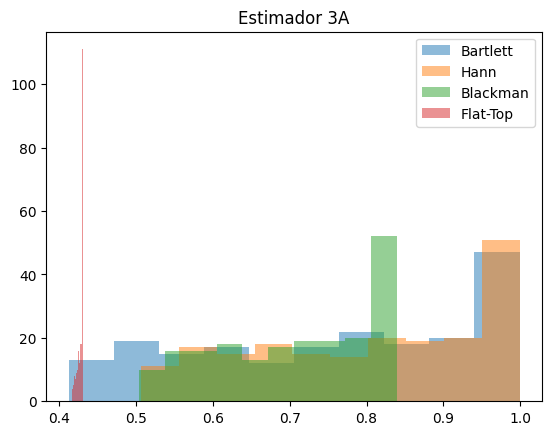

In [6]:
plt.figure(1)
plt.title("Estimador 3A")
kwargs = dict(alpha=0.5, bins=10, density=False, stacked=True)
# kwargs2 = dict(alpha=0.5, bins=2, density=False, stacked=True)
plt.hist(estimador3A[:,0], **kwargs, label='Bartlett')
plt.hist(estimador3A[:,1], **kwargs, label='Hann')
plt.hist(estimador3A[:,2], **kwargs, label='Blackman')
plt.hist(estimador3A[:,3], **kwargs, label='Flat-Top')
plt.legend()
plt.show()

Tabla comparativa con primer estimador

In [11]:
resultados3A = [ 
                   [bartlettSesgo[0], bartlettVarianza[0]], 
                   [hannSesgo[0], hannVarianza[0]],
                   [blackmanSesgo[0], blackmanVarianza[0]],
                   [flatTopSesgo[0], flatTopVarianza[0]], 
                 ]
df3A = DataFrame(resultados3A, columns=['$s_a$', '$v_a$'],
               index=[
                       'Bartlett',
                       'Hann',
                       'Blackman',
                       'Flat-Top'               
                       ])
HTML(df3A.to_html())

,$s_a$,$v_a$
Bartlett,-1.209516,0.034281
Hann,-1.167732,0.023819
Blackman,-1.271058,0.010909
Flat-Top,-1.569962,0.000018


Tabla comparativa con segundo estimador

In [14]:
resultados3B = [ 
                   [bartlettSesgo[1], bartlettVarianza[1]], 
                   [hannSesgo[1], hannVarianza[1]],
                   [blackmanSesgo[1], blackmanVarianza[1]],
                   [flatTopSesgo[1], flatTopVarianza[1]], 
                 ]
df3B = DataFrame(resultados3B, columns=['$s_a$', '$v_a$'],
               index=[
                       'Bartlett',
                       'Hann',
                       'Blackman',
                       'Flat-Top'               
                       ])
HTML(df3B.to_html())

,$s_a$,$v_a$
Bartlett,-0.851742,0.000461
Hann,-0.790503,0.000997
Blackman,-0.927989,0.001209
Flat-Top,-1.291734,0.000445
